In [1]:
%matplotlib inline
from matplotlib import pylab as plt
plt.style.use('ggplot')

from idrf import IDRF #Deconvolution routine

In [2]:
from obspy.clients.fdsn.client import Client

client = Client('IRIS')

network = 'II'
station = 'FFC'

inv = client.get_stations(network=network, station=station,level='response')

sta = inv[0][0]
sta

Station FFC (Flin Flon, Canada)
	Station Code: FFC
	Channel Count: 182/182 (Selected/Total)
	1993-08-28T00:00:00.000000Z - 2599-12-31T23:59:59.000000Z
	Access: open 
	Latitude: 54.73, Longitude: -101.98, Elevation: 338.0 m
	Available Channels:
		FFC..LOG, FFC.00.BHZ (8x), FFC.00.BHN (3x), FFC.00.BHE (3x), 
		FFC.00.BH1 (5x), FFC.00.BH2 (5x), FFC.00.EHZ, FFC.00.EHN, FFC.00.EHE
		FFC.00.ELZ, FFC.00.ELN, FFC.00.ELE, FFC.00.ENZ, FFC.00.EN1, 
		FFC.00.EN2, FFC.00.LCE, FFC.00.LCQ, FFC.00.LDI (2x), FFC.00.LHZ (8x)
		FFC.00.LHN (3x), FFC.00.LHE (3x), FFC.00.LH1 (5x), FFC.00.LH2 (5x)
		FFC.00.LNZ, FFC.00.LN1, FFC.00.LN2, FFC.00.SHZ, FFC.00.SHN, 
		FFC.00.SHE, FFC.00.SLZ, FFC.00.SLN, FFC.00.SLE, FFC.00.VHZ (8x), 
		FFC.00.VHN (3x), FFC.00.VHE (3x), FFC.00.VH1 (5x), FFC.00.VH2 (5x), 
		FFC.00.VMZ (3x), FFC.00.VMN, FFC.00.VME, FFC.00.VM1 (2x), 
		FFC.00.VM2 (2x), FFC.10.BHZ (5x), FFC.10.BH1 (5x), FFC.10.BH2 (5x), 
		FFC.10.LCE, FFC.10.LCQ, FFC.10.LDI, FFC.10.LHZ (5x), FFC.10.LH1 (5x)
		FFC.10.LH2 

In [3]:
import wget

!rm *.ndk

years = range(6,18)
months  = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
for year in years:
    for month in months:
        url='http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/20%02d/%s%02d.ndk' % (year, month, year)
        print(url)
        wget.download( url )

http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/jan06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/feb06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/mar06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/apr06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/may06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/jun06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/jul06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/aug06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/sep06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/oct06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/nov06.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2006/dec06.ndk
http

http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2014/apr14.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2014/may14.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2014/jun14.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2014/jul14.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2014/aug14.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2014/sep14.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2014/oct14.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2014/nov14.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2014/dec14.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2015/jan15.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2015/feb15.ndk
http://www.ldeo.columbia.edu/~gcmt/projects/CMT/catalog/NEW_MONTHLY/2015/mar15.ndk
http

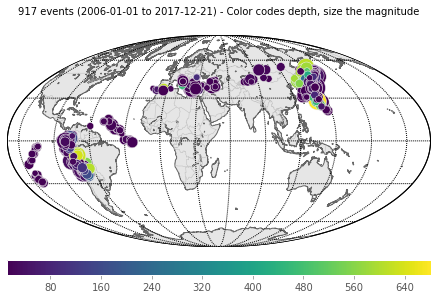

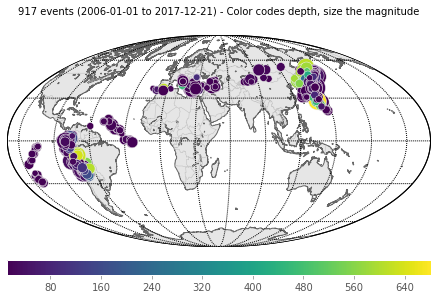

In [4]:
import obspy
from obspy.geodetics.base import gps2dist_azimuth
from obspy.clients.syngine import Client
from obspy.taup import TauPyModel

cat = obspy.core.event.Catalog()

for year in years:
    for month in months:
        tmp = obspy.read_events('%s%02d.ndk' % (month, year))
        cat = cat + tmp.filter('magnitude >= 5.5')
    
    
cat2 = obspy.core.event.Catalog()

for evt in cat:
    elat=evt.origins[0].latitude
    elon=evt.origins[0].longitude
    slat=sta.latitude
    slon=sta.longitude
    delm, az, baz = gps2dist_azimuth(elat, elon, slat, slon)
    deldeg=delm/1000/111.11
    if deldeg > 55 and deldeg < 85:
        cat2.append(evt)
        
cat2.plot()
    

In [10]:
from scipy.signal import tukey
from numpy import arange, linspace, zeros
from numpy.random import randn
from numpy import argmax, nan
import warnings
warnings.filterwarnings('ignore')

model = TauPyModel(model="iasp91")

#tries = linspace(0.5, 0.90, 5)
pctage=0.80

#tshifts = [-6, -3, 0, 3, 6]
tshifts = [0]

rbin    = zeros(len(tshifts)*len(cat2)*700).reshape(len(tshifts),len(cat2),700) * nan
rbin_s  = rbin.copy()
mbin1   = zeros(len(tshifts)*len(cat2)).reshape(len(tshifts),len(cat2)) * nan
mbin1_s = mbin1.copy()
mbin2   = mbin1.copy()
mbin2_s = mbin1.copy()

for ievt in range(len(cat2)):
    print('Working on %5d of %5d' % (ievt+1,len(cat2)))

    strike=cat2[ievt].focal_mechanisms[0].nodal_planes.nodal_plane_1.strike
    dip=cat2[ievt].focal_mechanisms[0].nodal_planes.nodal_plane_1.dip
    rake=cat2[ievt].focal_mechanisms[0].nodal_planes.nodal_plane_1.rake

    quake_depth_in_km=cat2[ievt].preferred_origin().depth/1000.0
    
    etime = cat2[ievt].preferred_origin().time

    slat=sta.latitude
    slon=sta.longitude
    elat=cat2[ievt].preferred_origin().latitude
    elon=cat2[ievt].preferred_origin().longitude

    client_syn = Client()
    
    t1=etime
    t2=etime+3600./2.

    for wvfrm_type in ['data','synthetic']:
    
        if wvfrm_type == 'synthetic':
            tmpstr = '%8.1f %8.1f %6.1f %8.1f %8.1f %8.2f %8.2f %8.2f ' % (elat, elon, quake_depth_in_km, slat, slon, strike, dip, rake)
            print(tmpstr)
            stis = client_syn.get_waveforms(model="iasp91_2s",
                                              sourcelatitude=elat,
                                              sourcelongitude=elon,
                                              sourcedepthinmeters=1000.*quake_depth_in_km,
                                              receiverlatitude=slat, receiverlongitude=slon,
                                              sourcedoublecouple=[strike,dip,rake],
                                              origintime=etime,
                                              units='velocity', starttime=t1, endtime=t2)
        else:
            #
            try:
                stis=client.get_waveforms(network,station,'10','LH?',t1,t2,attach_response=True)
                pre_filt = (0.005, 0.01, 5.0, 10.0)
                stis.remove_response(output='VEL', pre_filt=pre_filt)
            except:
                print('  get_waveforms failed.')
                break


            #


        print(stis)

        #print('...strike, dip, rake, elat, elon, quake_depth_in_km = %3d %3d %3d %5d %5d %5d %5d' % (strike, dip, rake, elat, elon, slat, quake_depth_in_km))


        delm, az, baz = gps2dist_azimuth(elat, elon, slat, slon)
        deldeg=delm/1000/111.11

        arrivals = model.get_travel_times(source_depth_in_km=quake_depth_in_km, distance_in_degree=deldeg,phase_list=['S'])

        stis.rotate('->ZNE',inventory=inv)
        #stis.rotate('NE->RT', back_azimuth = baz)
        stis.rotate('ZNE->LQT', inclination=arrivals[0].incident_angle, back_azimuth = baz)
        stis.detrend()

        stis.filter('bandpass', freqmin = 1./100., freqmax = 1./8., zerophase=True)
        #stis.filter('highpass', freq=1./20., zerophase=True)
        stis.resample(5)
        stis.differentiate()

        t1=etime+arrivals[0].time - 50
        t2=etime+arrivals[0].time + 50

        for ii, tshift in enumerate(tshifts):

            
            stis2=stis.copy().trim(t1+tshift,t2+tshift)
            
            try:
                dt = stis2[0].stats.delta
            except IndexError as e:
                print(e)
                break
                
            assert 'L' in stis2[0].stats.channel
            assert 'Q' in stis2[1].stats.channel
            assert 'T' in stis2[2].stats.channel
            
            

            P = stis2[1].copy().data
            D = stis2[0].copy().data

            #Indeces to mask out
            i1 = int(len(P) * (pctage)/2)
            i2 = int(len(P) - i1)
            
            N1=P.copy()[:i1]
            N2=D.copy()[:i1]

            P[:i1]=0.0
            P[i2:]=0.0
            P[i1:i2]= P[i1:i2] * tukey(len(P[i1:i2]))

            smax  = max(abs(P))
            nmax1 = max(abs(N1))
            nmax2 = max(abs(N2))
            #print(i1,i2,imax)
            
            TB = 1.5
            NT = 2

            Poverlap = 0.99
            win_len  = 100

            #times, RF = ETMTM(P,D,TB,NT,dt, tag='data', nalphas=20, Poverlap=0.99, win_len=70)
            #times, RF = ETMTM(P,D,TB,NT,dt, tag='data', nalphas=20, Poverlap=Poverlap, win_len=win_len)
            
            times, RF     = IDRF(P,D,dt)
            _,     RFnorm = IDRF(P,D,dt)
            
            #_, RFnorm = ETMTM(P,P,TB,NT,dt, tag='data', nalphas=20, Poverlap=Poverlap, win_len=win_len)

            if wvfrm_type == 'synthetic':
                rbin_s[ii,ievt,:len(RF)] = RF / max(abs(RFnorm))
                mbin1_s[ii,ievt] = smax/nmax1
                mbin2_s[ii,ievt] = smax/nmax2
            else:
                rbin[ii,ievt,:len(RF)] = RF / max(abs(RFnorm))
                mbin1[ii,ievt] = smax/nmax1
                mbin2[ii,ievt] = smax/nmax2
        

Working on     1 of   917
  get_waveforms failed.
Working on     2 of   917
  get_waveforms failed.
Working on     3 of   917
  get_waveforms failed.
Working on     4 of   917
  get_waveforms failed.
Working on     5 of   917
  get_waveforms failed.
Working on     6 of   917
  get_waveforms failed.
Working on     7 of   917
  get_waveforms failed.
Working on     8 of   917
  get_waveforms failed.
Working on     9 of   917
  get_waveforms failed.
Working on    10 of   917
  get_waveforms failed.
Working on    11 of   917
  get_waveforms failed.
Working on    12 of   917
  get_waveforms failed.
Working on    13 of   917
  get_waveforms failed.
Working on    14 of   917
  get_waveforms failed.
Working on    15 of   917
  get_waveforms failed.
Working on    16 of   917
  get_waveforms failed.
Working on    17 of   917
  get_waveforms failed.
Working on    18 of   917
  get_waveforms failed.
Working on    19 of   917
  get_waveforms failed.
Working on    20 of   917
  get_waveforms failed.


  get_waveforms failed.
Working on   166 of   917
  get_waveforms failed.
Working on   167 of   917
  get_waveforms failed.
Working on   168 of   917
  get_waveforms failed.
Working on   169 of   917
  get_waveforms failed.
Working on   170 of   917
  get_waveforms failed.
Working on   171 of   917
  get_waveforms failed.
Working on   172 of   917
  get_waveforms failed.
Working on   173 of   917
  get_waveforms failed.
Working on   174 of   917
  get_waveforms failed.
Working on   175 of   917
  get_waveforms failed.
Working on   176 of   917
  get_waveforms failed.
Working on   177 of   917
  get_waveforms failed.
Working on   178 of   917
  get_waveforms failed.
Working on   179 of   917
  get_waveforms failed.
Working on   180 of   917
  get_waveforms failed.
Working on   181 of   917
  get_waveforms failed.
Working on   182 of   917
  get_waveforms failed.
Working on   183 of   917
  get_waveforms failed.
Working on   184 of   917
  get_waveforms failed.
Working on   185 of   917


3 Trace(s) in Stream:
II.FFC.10.LH1 | 2009-09-17T23:21:46.069500Z - 2009-09-17T23:51:45.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2009-09-17T23:21:46.069500Z - 2009-09-17T23:51:45.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2009-09-17T23:21:46.069500Z - 2009-09-17T23:51:45.069500Z | 1.0 Hz, 1800 samples
   -29.2   -112.4   12.7     54.7   -102.0   115.00    86.00  -177.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2009-09-17T23:43:52.500000Z - 2009-09-17T23:45:32.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2009-09-17T23:43:52.500000Z - 2009-09-17T23:45:32.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2009-09-17T23:43:52.500000Z - 2009-09-17T23:45:32.400000Z | 10.0 Hz, 1000 samples
Working on   263 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2009-09-30T19:03:23.069500Z - 2009-09-30T19:33:22.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2009-09-30T19:03:23.069500Z - 2009-09-30T19:33:22.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2009-09-30T19:03:23.069500Z - 2009-0

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2009-12-12T18:55:48.600000Z - 2009-12-12T18:57:28.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2009-12-12T18:55:48.600000Z - 2009-12-12T18:57:28.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2009-12-12T18:55:48.600000Z - 2009-12-12T18:57:28.500000Z | 10.0 Hz, 1000 samples
Working on   274 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2009-12-17T01:37:53.069500Z - 2009-12-17T02:07:52.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2009-12-17T01:37:53.069500Z - 2009-12-17T02:07:52.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2009-12-17T01:37:53.069500Z - 2009-12-17T02:07:52.069500Z | 1.0 Hz, 1800 samples
    36.5     -9.9   47.6     54.7   -102.0   316.00    35.00  -170.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2009-12-17T01:55:43.200000Z - 2009-12-17T01:57:23.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2009-12-17T01:55:43.200000Z - 2009-12-17T01:57:23.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2009-12-17T01:55:43.200000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2010-02-27T19:54:35.069500Z - 2010-02-27T20:24:34.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2010-02-27T19:54:35.069500Z - 2010-02-27T20:24:34.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2010-02-27T19:54:35.069500Z - 2010-02-27T20:24:34.069500Z | 1.0 Hz, 1800 samples
    10.8    -43.4   14.0     54.7   -102.0   272.00    57.00   162.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2010-02-27T20:12:46.200000Z - 2010-02-27T20:14:26.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2010-02-27T20:12:46.200000Z - 2010-02-27T20:14:26.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2010-02-27T20:12:46.200000Z - 2010-02-27T20:14:26.100000Z | 10.0 Hz, 1000 samples
Working on   286 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2010-03-04T22:39:30.069500Z - 2010-03-04T23:09:29.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2010-03-04T22:39:30.069500Z - 2010-03-04T23:09:29.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2010-03-04T22:39:30.069500Z - 2010-0

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2010-04-11T22:25:01.800000Z - 2010-04-11T22:26:41.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2010-04-11T22:25:01.800000Z - 2010-04-11T22:26:41.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2010-04-11T22:25:01.800000Z - 2010-04-11T22:26:41.700000Z | 10.0 Hz, 1000 samples
Working on   297 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2010-04-15T20:52:37.069500Z - 2010-04-15T21:22:36.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2010-04-15T20:52:37.069500Z - 2010-04-15T21:22:36.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2010-04-15T20:52:37.069500Z - 2010-04-15T21:22:36.069500Z | 1.0 Hz, 1800 samples
   -13.4   -112.2   19.3     54.7   -102.0   103.00    87.00    -3.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2010-04-15T21:11:49.100000Z - 2010-04-15T21:13:29.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2010-04-15T21:11:49.100000Z - 2010-04-15T21:13:29.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2010-04-15T21:11:49.100000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2010-07-04T06:57:45.069500Z - 2010-07-04T07:27:44.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2010-07-04T06:57:45.069500Z - 2010-07-04T07:27:44.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2010-07-04T06:57:45.069500Z - 2010-07-04T07:27:44.069500Z | 1.0 Hz, 1800 samples
    -8.7    -80.8   12.0     54.7   -102.0   333.00    18.00    85.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2010-07-04T07:16:25.900000Z - 2010-07-04T07:18:05.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2010-07-04T07:16:25.900000Z - 2010-07-04T07:18:05.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2010-07-04T07:16:25.900000Z - 2010-07-04T07:18:05.800000Z | 10.0 Hz, 1000 samples
Working on   309 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2010-07-04T21:55:56.069500Z - 2010-07-04T22:25:55.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2010-07-04T21:55:56.069500Z - 2010-07-04T22:25:55.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2010-07-04T21:55:56.069500Z - 2010-0

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2010-09-22T08:19:54.800000Z - 2010-09-22T08:21:34.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2010-09-22T08:19:54.800000Z - 2010-09-22T08:21:34.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2010-09-22T08:19:54.800000Z - 2010-09-22T08:21:34.700000Z | 10.0 Hz, 1000 samples
Working on   320 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2010-10-14T13:58:59.069500Z - 2010-10-14T14:28:58.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2010-10-14T13:58:59.069500Z - 2010-10-14T14:28:58.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2010-10-14T13:58:59.069500Z - 2010-10-14T14:28:58.069500Z | 1.0 Hz, 1800 samples
    42.1    143.2   62.5     54.7   -102.0   236.00    33.00   118.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2010-10-14T14:18:03.800000Z - 2010-10-14T14:19:43.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2010-10-14T14:18:03.800000Z - 2010-10-14T14:19:43.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2010-10-14T14:18:03.800000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-01-10T10:24:23.069500Z - 2011-01-10T10:54:22.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-01-10T10:24:23.069500Z - 2011-01-10T10:54:22.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-01-10T10:24:23.069500Z - 2011-01-10T10:54:22.069500Z | 1.0 Hz, 1800 samples
    23.2    143.1   91.6     54.7   -102.0    17.00    47.00    18.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-01-10T10:46:14.700000Z - 2011-01-10T10:47:54.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-01-10T10:46:14.700000Z - 2011-01-10T10:47:54.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-01-10T10:46:14.700000Z - 2011-01-10T10:47:54.600000Z | 10.0 Hz, 1000 samples
Working on   332 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-01-12T21:32:59.069500Z - 2011-01-12T22:02:58.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-01-12T21:32:59.069500Z - 2011-01-12T22:02:58.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-01-12T21:32:59.069500Z - 2011-0

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-03-10T08:28:11.100000Z - 2011-03-10T08:29:51.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-03-10T08:28:11.100000Z - 2011-03-10T08:29:51.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-03-10T08:28:11.100000Z - 2011-03-10T08:29:51.000000Z | 10.0 Hz, 1000 samples
Working on   343 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-03-11T05:47:33.069500Z - 2011-03-11T06:17:32.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-03-11T05:47:33.069500Z - 2011-03-11T06:17:32.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-03-11T05:47:33.069500Z - 2011-03-11T06:17:32.069500Z | 1.0 Hz, 1800 samples
    37.5    143.1   20.0     54.7   -102.0   203.00    10.00    88.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-03-11T06:07:32.600000Z - 2011-03-11T06:09:12.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-03-11T06:07:32.600000Z - 2011-03-11T06:09:12.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-03-11T06:07:32.600000Z 

Working on   354 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-03-12T04:53:01.069500Z - 2011-03-12T05:23:00.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-03-12T04:53:01.069500Z - 2011-03-12T05:23:00.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-03-12T04:53:01.069500Z - 2011-03-12T05:23:00.069500Z | 1.0 Hz, 1800 samples
    40.1    143.5   28.7     54.7   -102.0   183.00    22.00    73.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-03-12T05:12:30.900000Z - 2011-03-12T05:14:10.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-03-12T05:12:30.900000Z - 2011-03-12T05:14:10.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-03-12T05:12:30.900000Z - 2011-03-12T05:14:10.800000Z | 10.0 Hz, 1000 samples
Working on   355 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-03-12T10:53:33.069500Z - 2011-03-12T11:23:32.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-03-12T10:53:33.069500Z - 2011-03-12T11:23:32.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-03-12

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-03-13T08:16:23.000000Z - 2011-03-13T08:18:02.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-03-13T08:16:23.000000Z - 2011-03-13T08:18:02.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-03-13T08:16:23.000000Z - 2011-03-13T08:18:02.900000Z | 10.0 Hz, 1000 samples
Working on   366 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-03-13T09:52:34.069500Z - 2011-03-13T10:22:33.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-03-13T09:52:34.069500Z - 2011-03-13T10:22:33.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-03-13T09:52:34.069500Z - 2011-03-13T10:22:33.069500Z | 1.0 Hz, 1800 samples
    38.9    142.2   50.0     54.7   -102.0   180.00    28.00    71.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-03-13T10:12:17.900000Z - 2011-03-13T10:13:57.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-03-13T10:12:17.900000Z - 2011-03-13T10:13:57.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-03-13T10:12:17.900000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-03-16T03:52:06.069500Z - 2011-03-16T04:22:05.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-03-16T03:52:06.069500Z - 2011-03-16T04:22:05.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-03-16T03:52:06.069500Z - 2011-03-16T04:22:05.069500Z | 1.0 Hz, 1800 samples
    35.8    140.8   12.0     54.7   -102.0   354.00    34.00   -94.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-03-16T04:12:34.700000Z - 2011-03-16T04:14:14.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-03-16T04:12:34.700000Z - 2011-03-16T04:14:14.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-03-16T04:12:34.700000Z - 2011-03-16T04:14:14.600000Z | 10.0 Hz, 1000 samples
Working on   378 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-03-16T06:29:07.069500Z - 2011-03-16T06:59:06.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-03-16T06:29:07.069500Z - 2011-03-16T06:59:06.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-03-16T06:29:07.069500Z - 2011-0

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-03-22T03:59:10.100000Z - 2011-03-22T04:00:50.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-03-22T03:59:10.100000Z - 2011-03-22T04:00:50.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-03-22T03:59:10.100000Z - 2011-03-22T04:00:50.000000Z | 10.0 Hz, 1000 samples
Working on   389 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-03-22T07:18:52.069500Z - 2011-03-22T07:48:51.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-03-22T07:18:52.069500Z - 2011-03-22T07:48:51.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-03-22T07:18:52.069500Z - 2011-03-22T07:48:51.069500Z | 1.0 Hz, 1800 samples
    37.1    144.0   12.3     54.7   -102.0    49.00    38.00   -74.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-03-22T07:38:52.600000Z - 2011-03-22T07:40:32.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-03-22T07:38:52.600000Z - 2011-03-22T07:40:32.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-03-22T07:38:52.600000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-03-27T22:24:02.069500Z - 2011-03-27T22:54:01.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-03-27T22:24:02.069500Z - 2011-03-27T22:54:01.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-03-27T22:24:02.069500Z - 2011-03-27T22:54:01.069500Z | 1.0 Hz, 1800 samples
    38.4    142.1   21.7     54.7   -102.0   123.00    28.00   -62.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-03-27T22:43:57.600000Z - 2011-03-27T22:45:37.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-03-27T22:43:57.600000Z - 2011-03-27T22:45:37.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-03-27T22:43:57.600000Z - 2011-03-27T22:45:37.500000Z | 10.0 Hz, 1000 samples
Working on   401 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-03-29T10:54:36.069500Z - 2011-03-29T11:24:35.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-03-29T10:54:36.069500Z - 2011-03-29T11:24:35.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-03-29T10:54:36.069500Z - 2011-0

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-04-11T23:28:51.200000Z - 2011-04-11T23:30:31.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-04-11T23:28:51.200000Z - 2011-04-11T23:30:31.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-04-11T23:28:51.200000Z - 2011-04-11T23:30:31.100000Z | 10.0 Hz, 1000 samples
Working on   412 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-04-12T05:07:46.069500Z - 2011-04-12T05:37:45.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-04-12T05:07:46.069500Z - 2011-04-12T05:37:45.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-04-12T05:07:46.069500Z - 2011-04-12T05:37:45.069500Z | 1.0 Hz, 1800 samples
    37.1    140.6   18.5     54.7   -102.0   170.00    53.00    12.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-04-12T05:28:01.700000Z - 2011-04-12T05:29:41.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-04-12T05:28:01.700000Z - 2011-04-12T05:29:41.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-04-12T05:28:01.700000Z 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-05-19T20:36:23.000000Z - 2011-05-19T20:38:02.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-05-19T20:36:23.000000Z - 2011-05-19T20:38:02.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-05-19T20:36:23.000000Z - 2011-05-19T20:38:02.900000Z | 10.0 Hz, 1000 samples
Working on   430 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-05-20T00:46:20.069500Z - 2011-05-20T01:16:19.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-05-20T00:46:20.069500Z - 2011-05-20T01:16:19.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-05-20T00:46:20.069500Z - 2011-05-20T01:16:19.069500Z | 1.0 Hz, 1800 samples
    35.7    141.2   36.6     54.7   -102.0   201.00    25.00    94.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-05-20T01:06:41.000000Z - 2011-05-20T01:08:20.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-05-20T01:06:41.000000Z - 2011-05-20T01:08:20.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-05-20T01:06:41.000000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-06-22T21:50:58.069500Z - 2011-06-22T22:20:57.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-06-22T21:50:58.069500Z - 2011-06-22T22:20:57.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-06-22T21:50:58.069500Z - 2011-06-22T22:20:57.069500Z | 1.0 Hz, 1800 samples
    40.0    142.5   41.3     54.7   -102.0   178.00    22.00    83.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-06-22T22:10:31.000000Z - 2011-06-22T22:12:10.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-06-22T22:10:31.000000Z - 2011-06-22T22:12:10.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-06-22T22:10:31.000000Z - 2011-06-22T22:12:10.900000Z | 10.0 Hz, 1000 samples
Working on   442 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-07-06T15:15:06.069500Z - 2011-07-06T15:45:05.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-07-06T15:15:06.069500Z - 2011-07-06T15:45:05.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-07-06T15:15:06.069500Z - 2011-0

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-08-01T14:04:24.400000Z - 2011-08-01T14:06:04.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-08-01T14:04:24.400000Z - 2011-08-01T14:06:04.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-08-01T14:04:24.400000Z - 2011-08-01T14:06:04.300000Z | 10.0 Hz, 1000 samples
Working on   453 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-08-01T14:58:15.069500Z - 2011-08-01T15:28:14.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-08-01T14:58:15.069500Z - 2011-08-01T15:28:14.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-08-01T14:58:15.069500Z - 2011-08-01T15:28:14.069500Z | 1.0 Hz, 1800 samples
    34.6    138.4   19.1     54.7   -102.0   271.00    33.00    81.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-08-01T15:19:04.100000Z - 2011-08-01T15:20:44.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-08-01T15:19:04.100000Z - 2011-08-01T15:20:44.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-08-01T15:19:04.100000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-09-16T20:11:17.069500Z - 2011-09-16T20:41:16.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-09-16T20:11:17.069500Z - 2011-09-16T20:41:16.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-09-16T20:11:17.069500Z - 2011-09-16T20:41:16.069500Z | 1.0 Hz, 1800 samples
    40.2    143.8   32.0     54.7   -102.0   192.00    23.00    81.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-09-16T20:30:43.600000Z - 2011-09-16T20:32:23.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-09-16T20:30:43.600000Z - 2011-09-16T20:32:23.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-09-16T20:30:43.600000Z - 2011-09-16T20:32:23.500000Z | 10.0 Hz, 1000 samples
Working on   465 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-09-16T21:08:10.069500Z - 2011-09-16T21:38:09.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-09-16T21:08:10.069500Z - 2011-09-16T21:38:09.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-09-16T21:08:10.069500Z - 2011-0

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-10-14T06:28:46.400000Z - 2011-10-14T06:30:26.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-10-14T06:28:46.400000Z - 2011-10-14T06:30:26.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-10-14T06:28:46.400000Z - 2011-10-14T06:30:26.300000Z | 10.0 Hz, 1000 samples
Working on   476 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-10-21T08:02:39.069500Z - 2011-10-21T08:32:38.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-10-21T08:02:39.069500Z - 2011-10-21T08:32:38.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-10-21T08:02:39.069500Z - 2011-10-21T08:32:38.069500Z | 1.0 Hz, 1800 samples
    43.8    142.5  191.5     54.7   -102.0    17.00    43.00  -160.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-10-21T08:21:06.100000Z - 2011-10-21T08:22:46.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-10-21T08:21:06.100000Z - 2011-10-21T08:22:46.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-10-21T08:21:06.100000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-11-22T18:48:20.069500Z - 2011-11-22T19:18:19.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-11-22T18:48:20.069500Z - 2011-11-22T19:18:19.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-11-22T18:48:20.069500Z - 2011-11-22T19:18:19.069500Z | 1.0 Hz, 1800 samples
   -15.4    -65.2  553.8     54.7   -102.0   163.00    11.00   102.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2011-11-22T19:07:25.200000Z - 2011-11-22T19:09:05.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2011-11-22T19:07:25.200000Z - 2011-11-22T19:09:05.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2011-11-22T19:07:25.200000Z - 2011-11-22T19:09:05.100000Z | 10.0 Hz, 1000 samples
Working on   488 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2011-11-23T19:24:35.069500Z - 2011-11-23T19:54:34.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2011-11-23T19:24:35.069500Z - 2011-11-23T19:54:34.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2011-11-23T19:24:35.069500Z - 2011-1

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2012-02-14T06:42:21.400000Z - 2012-02-14T06:44:01.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2012-02-14T06:42:21.400000Z - 2012-02-14T06:44:01.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2012-02-14T06:42:21.400000Z - 2012-02-14T06:44:01.300000Z | 10.0 Hz, 1000 samples
Working on   499 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2012-02-26T06:17:25.069500Z - 2012-02-26T06:47:24.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2012-02-26T06:17:25.069500Z - 2012-02-26T06:47:24.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2012-02-26T06:17:25.069500Z - 2012-02-26T06:47:24.069500Z | 1.0 Hz, 1800 samples
    51.7     96.0   20.5     54.7   -102.0   285.00    43.00    58.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2012-02-26T06:37:27.000000Z - 2012-02-26T06:39:06.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2012-02-26T06:37:27.000000Z - 2012-02-26T06:39:06.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2012-02-26T06:37:27.000000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2012-04-14T15:13:16.069500Z - 2012-04-14T15:43:15.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2012-04-14T15:13:16.069500Z - 2012-04-14T15:43:15.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2012-04-14T15:13:16.069500Z - 2012-04-14T15:43:15.069500Z | 1.0 Hz, 1800 samples
    49.3    156.0   90.4     54.7   -102.0   114.00    31.00   -23.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2012-04-14T15:29:56.300000Z - 2012-04-14T15:31:36.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2012-04-14T15:29:56.300000Z - 2012-04-14T15:31:36.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2012-04-14T15:29:56.300000Z - 2012-04-14T15:31:36.200000Z | 10.0 Hz, 1000 samples
Working on   511 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2012-04-16T11:23:47.069500Z - 2012-04-16T11:53:46.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2012-04-16T11:23:47.069500Z - 2012-04-16T11:53:46.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2012-04-16T11:23:47.069500Z - 2012-0

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2012-05-20T02:22:38.600000Z - 2012-05-20T02:24:18.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2012-05-20T02:22:38.600000Z - 2012-05-20T02:24:18.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2012-05-20T02:22:38.600000Z - 2012-05-20T02:24:18.500000Z | 10.0 Hz, 1000 samples
Working on   522 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2012-05-20T07:20:44.069500Z - 2012-05-20T07:50:43.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2012-05-20T07:20:44.069500Z - 2012-05-20T07:50:43.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2012-05-20T07:20:44.069500Z - 2012-05-20T07:50:43.069500Z | 1.0 Hz, 1800 samples
    39.6    143.6   17.2     54.7   -102.0   177.00    16.00    67.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2012-05-20T07:40:21.900000Z - 2012-05-20T07:42:01.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2012-05-20T07:40:21.900000Z - 2012-05-20T07:42:01.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2012-05-20T07:40:21.900000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2012-06-17T20:32:26.069500Z - 2012-06-17T21:02:25.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2012-06-17T20:32:26.069500Z - 2012-06-17T21:02:25.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2012-06-17T20:32:26.069500Z - 2012-06-17T21:02:25.069500Z | 1.0 Hz, 1800 samples
    38.9    142.2   47.0     54.7   -102.0   185.00    24.00    76.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2012-06-17T20:52:10.200000Z - 2012-06-17T20:53:50.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2012-06-17T20:52:10.200000Z - 2012-06-17T20:53:50.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2012-06-17T20:52:10.200000Z - 2012-06-17T20:53:50.100000Z | 10.0 Hz, 1000 samples
Working on   534 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2012-06-29T21:07:36.069500Z - 2012-06-29T21:37:35.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2012-06-29T21:07:36.069500Z - 2012-06-29T21:37:35.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2012-06-29T21:07:36.069500Z - 2012-0

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2012-08-02T09:57:04.600000Z - 2012-08-02T09:58:44.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2012-08-02T09:57:04.600000Z - 2012-08-02T09:58:44.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2012-08-02T09:57:04.600000Z - 2012-08-02T09:58:44.500000Z | 10.0 Hz, 1000 samples
Working on   545 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2012-08-11T12:23:21.069500Z - 2012-08-11T12:53:20.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2012-08-11T12:23:21.069500Z - 2012-08-11T12:53:20.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2012-08-11T12:23:21.069500Z - 2012-08-11T12:53:20.069500Z | 1.0 Hz, 1800 samples
    38.3     46.8   15.0     54.7   -102.0   175.00    81.00     6.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2012-08-11T12:45:19.500000Z - 2012-08-11T12:46:59.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2012-08-11T12:45:19.500000Z - 2012-08-11T12:46:59.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2012-08-11T12:45:19.500000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2012-10-14T09:42:03.069500Z - 2012-10-14T10:12:02.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2012-10-14T09:42:03.069500Z - 2012-10-14T10:12:02.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2012-10-14T09:42:03.069500Z - 2012-10-14T10:12:02.069500Z | 1.0 Hz, 1800 samples
    48.3    154.8   46.1     54.7   -102.0   207.00    48.00    59.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2012-10-14T09:59:08.400000Z - 2012-10-14T10:00:48.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2012-10-14T09:59:08.400000Z - 2012-10-14T10:00:48.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2012-10-14T09:59:08.400000Z - 2012-10-14T10:00:48.300000Z | 10.0 Hz, 1000 samples
Working on   557 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2012-10-14T10:13:40.069500Z - 2012-10-14T10:43:39.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2012-10-14T10:13:40.069500Z - 2012-10-14T10:43:39.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2012-10-14T10:13:40.069500Z - 2012-1

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2012-11-22T13:27:36.800000Z - 2012-11-22T13:29:16.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2012-11-22T13:27:36.800000Z - 2012-11-22T13:29:16.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2012-11-22T13:27:36.800000Z - 2012-11-22T13:29:16.700000Z | 10.0 Hz, 1000 samples
Working on   568 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2012-11-26T00:17:18.069500Z - 2012-11-26T00:47:17.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2012-11-26T00:17:18.069500Z - 2012-11-26T00:47:17.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2012-11-26T00:17:18.069500Z - 2012-11-26T00:47:17.069500Z | 1.0 Hz, 1800 samples
    -9.1   -108.5   15.0     54.7   -102.0   194.00    84.00  -177.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2012-11-26T00:35:35.800000Z - 2012-11-26T00:37:15.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2012-11-26T00:35:35.800000Z - 2012-11-26T00:37:15.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2012-11-26T00:35:35.800000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2013-01-28T16:38:57.069500Z - 2013-01-28T17:08:56.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2013-01-28T16:38:57.069500Z - 2013-01-28T17:08:56.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2013-01-28T16:38:57.069500Z - 2013-01-28T17:08:56.069500Z | 1.0 Hz, 1800 samples
    42.6     79.8   24.4     54.7   -102.0   148.00    81.00   178.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2013-01-28T17:00:47.900000Z - 2013-01-28T17:02:27.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2013-01-28T17:00:47.900000Z - 2013-01-28T17:02:27.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2013-01-28T17:00:47.900000Z - 2013-01-28T17:02:27.800000Z | 10.0 Hz, 1000 samples
Working on   580 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2013-02-02T14:17:43.069500Z - 2013-02-02T14:47:42.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2013-02-02T14:17:43.069500Z - 2013-02-02T14:47:42.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2013-02-02T14:17:43.069500Z - 2013-0

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2013-04-02T02:28:28.900000Z - 2013-04-02T02:30:08.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2013-04-02T02:28:28.900000Z - 2013-04-02T02:30:08.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2013-04-02T02:28:28.900000Z - 2013-04-02T02:30:08.800000Z | 10.0 Hz, 1000 samples
Working on   591 of   917
6 Trace(s) in Stream:
II.FFC.10.LH1 | 2013-04-05T13:00:05.069500Z - 2013-04-05T13:08:58.069500Z | 1.0 Hz, 534 samples
II.FFC.10.LH1 | 2013-04-05T13:16:44.069500Z - 2013-04-05T13:30:04.069500Z | 1.0 Hz, 801 samples
II.FFC.10.LH2 | 2013-04-05T13:00:05.069500Z - 2013-04-05T13:08:58.069500Z | 1.0 Hz, 534 samples
II.FFC.10.LH2 | 2013-04-05T13:16:44.069500Z - 2013-04-05T13:30:04.069500Z | 1.0 Hz, 801 samples
II.FFC.10.LHZ | 2013-04-05T13:00:05.069500Z - 2013-04-05T13:08:58.069500Z | 1.0 Hz, 534 samples
II.FFC.10.LHZ | 2013-04-05T13:16:44.069500Z - 2013-04-05T13:30:04.069500Z | 1.0 Hz, 801 samples
    42.8    131.0  571.9     54.7   -102.0   299.00   

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2013-04-29T13:22:10.500000Z - 2013-04-29T13:23:50.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2013-04-29T13:22:10.500000Z - 2013-04-29T13:23:50.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2013-04-29T13:22:10.500000Z - 2013-04-29T13:23:50.400000Z | 10.0 Hz, 1000 samples
Working on   601 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2013-05-18T05:48:04.069500Z - 2013-05-18T06:18:03.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2013-05-18T05:48:04.069500Z - 2013-05-18T06:18:03.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2013-05-18T05:48:04.069500Z - 2013-05-18T06:18:03.069500Z | 1.0 Hz, 1800 samples
    37.7    141.7   49.6     54.7   -102.0   202.00    24.00    90.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2013-05-18T06:08:01.300000Z - 2013-05-18T06:09:41.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2013-05-18T06:08:01.300000Z - 2013-05-18T06:09:41.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2013-05-18T06:08:01.300000Z 

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2013-07-17T02:58:15.300000Z - 2013-07-17T02:59:55.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2013-07-17T02:58:15.300000Z - 2013-07-17T02:59:55.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2013-07-17T02:58:15.300000Z - 2013-07-17T02:59:55.200000Z | 10.0 Hz, 1000 samples
Working on   612 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2013-08-04T03:28:53.069500Z - 2013-08-04T03:58:52.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2013-08-04T03:28:53.069500Z - 2013-08-04T03:58:52.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2013-08-04T03:28:53.069500Z - 2013-08-04T03:58:52.069500Z | 1.0 Hz, 1800 samples
    38.2    141.8   53.8     54.7   -102.0     6.00    39.00    90.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2013-08-04T03:48:44.100000Z - 2013-08-04T03:50:24.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2013-08-04T03:48:44.100000Z - 2013-08-04T03:50:24.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2013-08-04T03:48:44.100000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2013-10-12T13:11:57.069500Z - 2013-10-12T13:41:56.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2013-10-12T13:11:57.069500Z - 2013-10-12T13:41:56.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2013-10-12T13:11:57.069500Z - 2013-10-12T13:41:56.069500Z | 1.0 Hz, 1800 samples
    35.4     23.4   15.0     54.7   -102.0   339.00     3.00   130.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2013-10-12T13:33:05.600000Z - 2013-10-12T13:34:45.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2013-10-12T13:33:05.600000Z - 2013-10-12T13:34:45.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2013-10-12T13:33:05.600000Z - 2013-10-12T13:34:45.500000Z | 10.0 Hz, 1000 samples
Working on   624 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2013-10-25T17:10:26.069500Z - 2013-10-25T17:40:25.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2013-10-25T17:10:26.069500Z - 2013-10-25T17:40:25.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2013-10-25T17:10:26.069500Z - 2013-1

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2013-12-14T04:26:42.300000Z - 2013-12-14T04:28:22.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2013-12-14T04:26:42.300000Z - 2013-12-14T04:28:22.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2013-12-14T04:26:42.300000Z - 2013-12-14T04:28:22.200000Z | 10.0 Hz, 1000 samples
Working on   635 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2013-12-17T23:38:12.069500Z - 2013-12-18T00:08:11.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2013-12-17T23:38:12.069500Z - 2013-12-18T00:08:11.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2013-12-17T23:38:12.069500Z - 2013-12-18T00:08:11.069500Z | 1.0 Hz, 1800 samples
    20.9    147.0   12.0     54.7   -102.0   316.00    42.00   -98.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2013-12-18T00:00:22.600000Z - 2013-12-18T00:02:02.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2013-12-18T00:00:22.600000Z - 2013-12-18T00:02:02.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2013-12-18T00:00:22.600000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2014-02-12T11:43:20.069500Z - 2014-02-12T12:13:19.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2014-02-12T11:43:20.069500Z - 2014-02-12T12:13:19.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2014-02-12T11:43:20.069500Z - 2014-02-12T12:13:19.069500Z | 1.0 Hz, 1800 samples
   -22.2    -68.7  131.0     54.7   -102.0   190.00    41.00   -57.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2014-02-12T12:04:37.100000Z - 2014-02-12T12:06:17.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2014-02-12T12:04:37.100000Z - 2014-02-12T12:06:17.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2014-02-12T12:04:37.100000Z - 2014-02-12T12:06:17.000000Z | 10.0 Hz, 1000 samples
Working on   647 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2014-02-14T07:44:21.069500Z - 2014-02-14T08:14:20.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2014-02-14T07:44:21.069500Z - 2014-02-14T08:14:20.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2014-02-14T07:44:21.069500Z - 2014-0

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2014-03-22T13:51:12.100000Z - 2014-03-22T13:52:52.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2014-03-22T13:51:12.100000Z - 2014-03-22T13:52:52.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2014-03-22T13:51:12.100000Z - 2014-03-22T13:52:52.000000Z | 10.0 Hz, 1000 samples
Working on   658 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2014-03-23T18:20:09.069500Z - 2014-03-23T18:50:08.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2014-03-23T18:20:09.069500Z - 2014-03-23T18:50:08.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2014-03-23T18:20:09.069500Z - 2014-03-23T18:50:08.069500Z | 1.0 Hz, 1800 samples
   -19.7    -71.0   21.7     54.7   -102.0   350.00    21.00   100.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2014-03-23T18:41:17.000000Z - 2014-03-23T18:42:56.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2014-03-23T18:41:17.000000Z - 2014-03-23T18:42:56.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2014-03-23T18:41:17.000000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2014-04-04T20:08:09.069500Z - 2014-04-04T20:38:08.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2014-04-04T20:08:09.069500Z - 2014-04-04T20:38:08.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2014-04-04T20:08:09.069500Z - 2014-04-04T20:38:08.069500Z | 1.0 Hz, 1800 samples
    37.1     23.7  122.4     54.7   -102.0    18.00    53.00    33.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2014-04-04T20:28:39.900000Z - 2014-04-04T20:30:19.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2014-04-04T20:28:39.900000Z - 2014-04-04T20:30:19.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2014-04-04T20:28:39.900000Z - 2014-04-04T20:30:19.800000Z | 10.0 Hz, 1000 samples
Working on   670 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2014-04-07T13:43:27.069500Z - 2014-04-07T14:13:26.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2014-04-07T13:43:27.069500Z - 2014-04-07T14:13:26.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2014-04-07T13:43:27.069500Z - 2014-0

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2014-05-17T09:32:23.800000Z - 2014-05-17T09:34:03.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2014-05-17T09:32:23.800000Z - 2014-05-17T09:34:03.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2014-05-17T09:32:23.800000Z - 2014-05-17T09:34:03.700000Z | 10.0 Hz, 1000 samples
Working on   681 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2014-05-18T23:47:11.069500Z - 2014-05-19T00:17:10.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2014-05-18T23:47:11.069500Z - 2014-05-19T00:17:10.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2014-05-18T23:47:11.069500Z - 2014-05-19T00:17:10.069500Z | 1.0 Hz, 1800 samples
    -4.5   -105.8   15.0     54.7   -102.0    99.00    76.00    -9.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2014-05-19T00:04:27.800000Z - 2014-05-19T00:06:07.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2014-05-19T00:04:27.800000Z - 2014-05-19T00:06:07.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2014-05-19T00:04:27.800000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2014-06-19T19:54:12.069500Z - 2014-06-19T20:24:11.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2014-06-19T19:54:12.069500Z - 2014-06-19T20:24:11.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2014-06-19T19:54:12.069500Z - 2014-06-19T20:24:11.069500Z | 1.0 Hz, 1800 samples
   -19.8    -71.2   23.0     54.7   -102.0   351.00    22.00    91.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2014-06-19T20:15:20.300000Z - 2014-06-19T20:17:00.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2014-06-19T20:15:20.300000Z - 2014-06-19T20:17:00.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2014-06-19T20:15:20.300000Z - 2014-06-19T20:17:00.200000Z | 10.0 Hz, 1000 samples
Working on   693 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2014-06-20T19:53:38.069500Z - 2014-06-20T20:23:37.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2014-06-20T19:53:38.069500Z - 2014-06-20T20:23:37.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2014-06-20T19:53:38.069500Z - 2014-0

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2014-08-03T21:20:22.900000Z - 2014-08-03T21:22:02.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2014-08-03T21:20:22.900000Z - 2014-08-03T21:22:02.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2014-08-03T21:20:22.900000Z - 2014-08-03T21:22:02.800000Z | 10.0 Hz, 1000 samples
Working on   704 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2014-08-10T03:43:22.069500Z - 2014-08-10T04:13:21.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2014-08-10T03:43:22.069500Z - 2014-08-10T04:13:21.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2014-08-10T03:43:22.069500Z - 2014-08-10T04:13:21.069500Z | 1.0 Hz, 1800 samples
    41.2    142.4   48.9     54.7   -102.0   182.00    26.00    70.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2014-08-10T04:02:41.900000Z - 2014-08-10T04:04:21.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2014-08-10T04:02:41.900000Z - 2014-08-10T04:04:21.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2014-08-10T04:02:41.900000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2014-09-24T11:16:19.069500Z - 2014-09-24T11:46:18.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2014-09-24T11:16:19.069500Z - 2014-09-24T11:46:18.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2014-09-24T11:16:19.069500Z - 2014-09-24T11:46:18.069500Z | 1.0 Hz, 1800 samples
   -23.8    -66.7  227.6     54.7   -102.0   177.00    31.00   -97.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2014-09-24T11:37:38.100000Z - 2014-09-24T11:39:18.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2014-09-24T11:37:38.100000Z - 2014-09-24T11:39:18.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2014-09-24T11:37:38.100000Z - 2014-09-24T11:39:18.000000Z | 10.0 Hz, 1000 samples
Working on   717 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2014-10-03T00:57:34.069500Z - 2014-10-03T01:27:33.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2014-10-03T00:57:34.069500Z - 2014-10-03T01:27:33.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2014-10-03T00:57:34.069500Z - 2014-1

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2014-12-20T09:50:03.100000Z - 2014-12-20T09:51:43.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2014-12-20T09:50:03.100000Z - 2014-12-20T09:51:43.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2014-12-20T09:50:03.100000Z - 2014-12-20T09:51:43.000000Z | 10.0 Hz, 1000 samples
Working on   728 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2015-01-17T18:41:46.069500Z - 2015-01-17T19:11:45.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2015-01-17T18:41:46.069500Z - 2015-01-17T19:11:45.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2015-01-17T18:41:46.069500Z - 2015-01-17T19:11:45.069500Z | 1.0 Hz, 1800 samples
   -22.1    -63.2  572.6     54.7   -102.0   143.00    19.00    58.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2015-01-17T19:01:58.600000Z - 2015-01-17T19:03:38.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2015-01-17T19:01:58.600000Z - 2015-01-17T19:03:38.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2015-01-17T19:01:58.600000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2015-04-01T16:45:26.069500Z - 2015-04-01T17:15:25.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2015-04-01T16:45:26.069500Z - 2015-04-01T17:15:25.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2015-04-01T16:45:26.069500Z - 2015-04-01T17:15:25.069500Z | 1.0 Hz, 1800 samples
   -10.5    -78.0   25.8     54.7   -102.0   284.00     4.00  -128.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2015-04-01T17:04:32.300000Z - 2015-04-01T17:06:12.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2015-04-01T17:04:32.300000Z - 2015-04-01T17:06:12.200000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2015-04-01T17:04:32.300000Z - 2015-04-01T17:06:12.200000Z | 10.0 Hz, 1000 samples
Working on   740 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2015-04-16T18:07:48.069500Z - 2015-04-16T18:37:47.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2015-04-16T18:07:48.069500Z - 2015-04-16T18:37:47.069500Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2015-04-16T18:07:48.069500Z - 2015-0

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2015-06-10T14:13:30.900000Z - 2015-06-10T14:15:10.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2015-06-10T14:13:30.900000Z - 2015-06-10T14:15:10.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2015-06-10T14:13:30.900000Z - 2015-06-10T14:15:10.800000Z | 10.0 Hz, 1000 samples
Working on   751 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2015-06-11T04:45:34.069538Z - 2015-06-11T05:15:33.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2015-06-11T04:45:34.069539Z - 2015-06-11T05:15:33.069539Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2015-06-11T04:45:34.069538Z - 2015-06-11T05:15:33.069538Z | 1.0 Hz, 1800 samples
    39.6    143.5   18.7     54.7   -102.0   180.00    17.00    81.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2015-06-11T05:05:10.700000Z - 2015-06-11T05:06:50.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2015-06-11T05:05:10.700000Z - 2015-06-11T05:06:50.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2015-06-11T05:05:10.700000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2015-09-01T15:25:14.069538Z - 2015-09-01T15:55:13.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2015-09-01T15:25:14.069538Z - 2015-09-01T15:55:13.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2015-09-01T15:25:14.069538Z - 2015-09-01T15:55:13.069538Z | 1.0 Hz, 1800 samples
    31.2    141.8   12.0     54.7   -102.0   196.00    35.00   102.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2015-09-01T15:46:21.200000Z - 2015-09-01T15:48:01.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2015-09-01T15:46:21.200000Z - 2015-09-01T15:48:01.100000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2015-09-01T15:46:21.200000Z - 2015-09-01T15:48:01.100000Z | 10.0 Hz, 1000 samples
Working on   763 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2015-09-05T13:16:12.069538Z - 2015-09-05T13:46:11.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2015-09-05T13:16:12.069538Z - 2015-09-05T13:46:11.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2015-09-05T13:16:12.069538Z - 2015-0

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2015-11-16T17:06:24.100000Z - 2015-11-16T17:08:04.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2015-11-16T17:06:24.100000Z - 2015-11-16T17:08:04.000000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2015-11-16T17:06:24.100000Z - 2015-11-16T17:08:04.000000Z | 10.0 Hz, 1000 samples
Working on   774 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2015-11-17T07:10:13.069538Z - 2015-11-17T07:40:12.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2015-11-17T07:10:13.069538Z - 2015-11-17T07:40:12.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2015-11-17T07:10:13.069538Z - 2015-11-17T07:40:12.069538Z | 1.0 Hz, 1800 samples
    38.5     20.5   15.0     54.7   -102.0    22.00    64.00   179.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2015-11-17T07:30:40.500000Z - 2015-11-17T07:32:20.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2015-11-17T07:30:40.500000Z - 2015-11-17T07:32:20.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2015-11-17T07:30:40.500000Z 

   -16.6    -73.9   34.1     54.7   -102.0   310.00    24.00    48.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2016-02-16T11:06:58.700000Z - 2016-02-16T11:08:38.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2016-02-16T11:06:58.700000Z - 2016-02-16T11:08:38.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2016-02-16T11:06:58.700000Z - 2016-02-16T11:08:38.600000Z | 10.0 Hz, 1000 samples
Working on   792 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2016-02-21T21:26:48.069539Z - 2016-02-21T21:56:47.069539Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2016-02-21T21:26:48.069539Z - 2016-02-21T21:56:47.069539Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2016-02-21T21:26:48.069539Z - 2016-02-21T21:56:47.069539Z | 1.0 Hz, 1800 samples
    24.5    142.5   36.0     54.7   -102.0   164.00    35.00    70.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2016-02-21T21:48:42.900000Z - 2016-02-21T21:50:22.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2016-02-21T21:48:42.900000Z - 2016-02-21T21:50:22.800000Z

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2016-04-19T22:22:30.069538Z - 2016-04-19T22:52:29.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2016-04-19T22:22:30.069538Z - 2016-04-19T22:52:29.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2016-04-19T22:22:30.069538Z - 2016-04-19T22:52:29.069538Z | 1.0 Hz, 1800 samples
     0.5    -80.3   13.6     54.7   -102.0    12.00    17.00   100.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2016-04-19T22:39:18.700000Z - 2016-04-19T22:40:58.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2016-04-19T22:39:18.700000Z - 2016-04-19T22:40:58.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2016-04-19T22:39:18.700000Z - 2016-04-19T22:40:58.600000Z | 10.0 Hz, 1000 samples
Working on   804 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2016-04-20T08:33:51.069538Z - 2016-04-20T09:03:50.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2016-04-20T08:33:51.069538Z - 2016-04-20T09:03:50.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2016-04-20T08:33:51.069538Z - 2016-0

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2016-07-24T14:32:12.500000Z - 2016-07-24T14:33:52.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2016-07-24T14:32:12.500000Z - 2016-07-24T14:33:52.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2016-07-24T14:32:12.500000Z - 2016-07-24T14:33:52.400000Z | 10.0 Hz, 1000 samples
Working on   826 of   917
  get_waveforms failed.
Working on   827 of   917
  get_waveforms failed.
Working on   828 of   917
  get_waveforms failed.
Working on   829 of   917
  get_waveforms failed.
Working on   830 of   917
  get_waveforms failed.
Working on   831 of   917
  get_waveforms failed.
Working on   832 of   917
  get_waveforms failed.
Working on   833 of   917
  get_waveforms failed.
Working on   834 of   917
  get_waveforms failed.
Working on   835 of   917
  get_waveforms failed.
Working on   836 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2016-09-09T11:53:20.069538Z - 2016-09-09T12:23:19.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2016-09-09T11:53:

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2016-10-15T20:35:04.600000Z - 2016-10-15T20:36:44.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2016-10-15T20:35:04.600000Z - 2016-10-15T20:36:44.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2016-10-15T20:35:04.600000Z - 2016-10-15T20:36:44.500000Z | 10.0 Hz, 1000 samples
Working on   847 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2016-10-20T00:09:30.069538Z - 2016-10-20T00:39:29.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2016-10-20T00:09:30.069538Z - 2016-10-20T00:39:29.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2016-10-20T00:09:30.069538Z - 2016-10-20T00:39:29.069538Z | 1.0 Hz, 1800 samples
    13.4    -44.8   12.0     54.7   -102.0   175.00    44.00   -98.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2016-10-20T00:27:05.000000Z - 2016-10-20T00:28:44.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2016-10-20T00:27:05.000000Z - 2016-10-20T00:28:44.900000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2016-10-20T00:27:05.000000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2016-11-23T21:23:40.069538Z - 2016-11-23T21:53:39.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2016-11-23T21:23:40.069538Z - 2016-11-23T21:53:39.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2016-11-23T21:23:40.069538Z - 2016-11-23T21:53:39.069538Z | 1.0 Hz, 1800 samples
    37.2    141.3   12.0     54.7   -102.0    15.00    34.00   -99.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2016-11-23T21:43:53.500000Z - 2016-11-23T21:45:33.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2016-11-23T21:43:53.500000Z - 2016-11-23T21:45:33.400000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2016-11-23T21:43:53.500000Z - 2016-11-23T21:45:33.400000Z | 10.0 Hz, 1000 samples
Working on   859 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2016-12-01T22:40:31.069538Z - 2016-12-01T23:10:30.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2016-12-01T22:40:31.069538Z - 2016-12-01T23:10:30.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2016-12-01T22:40:31.069538Z - 2016-1

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2017-01-18T10:33:28.400000Z - 2017-01-18T10:35:08.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2017-01-18T10:33:28.400000Z - 2017-01-18T10:35:08.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2017-01-18T10:33:28.400000Z - 2017-01-18T10:35:08.300000Z | 10.0 Hz, 1000 samples
Working on   870 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2017-01-18T10:25:29.069538Z - 2017-01-18T10:55:28.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2017-01-18T10:25:29.069538Z - 2017-01-18T10:55:28.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2017-01-18T10:25:29.069538Z - 2017-01-18T10:55:28.069538Z | 1.0 Hz, 1800 samples
    42.5     13.3   13.1     54.7   -102.0   132.00    37.00  -105.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2017-01-18T10:44:43.900000Z - 2017-01-18T10:46:23.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2017-01-18T10:44:43.900000Z - 2017-01-18T10:46:23.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2017-01-18T10:44:43.900000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2017-06-05T11:34:12.069538Z - 2017-06-05T12:04:11.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2017-06-05T11:34:12.069538Z - 2017-06-05T12:04:11.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2017-06-05T11:34:12.069538Z - 2017-06-05T12:04:11.069538Z | 1.0 Hz, 1800 samples
    -4.2    -80.7   51.6     54.7   -102.0   157.00    45.00    64.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2017-06-05T11:51:49.900000Z - 2017-06-05T11:53:29.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2017-06-05T11:51:49.900000Z - 2017-06-05T11:53:29.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2017-06-05T11:51:49.900000Z - 2017-06-05T11:53:29.800000Z | 10.0 Hz, 1000 samples
Working on   882 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2017-06-12T12:28:42.069538Z - 2017-06-12T12:58:41.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2017-06-12T12:28:42.069538Z - 2017-06-12T12:58:41.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2017-06-12T12:28:42.069538Z - 2017-0

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2017-07-30T21:18:29.600000Z - 2017-07-30T21:20:09.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2017-07-30T21:18:29.600000Z - 2017-07-30T21:20:09.500000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2017-07-30T21:18:29.600000Z - 2017-07-30T21:20:09.500000Z | 10.0 Hz, 1000 samples
Working on   893 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2017-08-08T23:27:58.069538Z - 2017-08-08T23:57:57.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2017-08-08T23:27:58.069538Z - 2017-08-08T23:57:57.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2017-08-08T23:27:58.069538Z - 2017-08-08T23:57:57.069538Z | 1.0 Hz, 1800 samples
    44.4     82.7   27.6     54.7   -102.0   101.00    44.00   118.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2017-08-08T23:49:28.700000Z - 2017-08-08T23:51:08.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2017-08-08T23:49:28.700000Z - 2017-08-08T23:51:08.600000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2017-08-08T23:49:28.700000Z 

3 Trace(s) in Stream:
II.FFC.10.LH1 | 2017-10-06T02:03:51.069538Z - 2017-10-06T02:33:50.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2017-10-06T02:03:51.069538Z - 2017-10-06T02:33:50.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2017-10-06T02:03:51.069538Z - 2017-10-06T02:33:50.069538Z | 1.0 Hz, 1800 samples
     0.9    -25.8   16.6     54.7   -102.0   174.00    72.00    -2.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2017-10-06T02:25:26.800000Z - 2017-10-06T02:27:06.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2017-10-06T02:25:26.800000Z - 2017-10-06T02:27:06.700000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2017-10-06T02:25:26.800000Z - 2017-10-06T02:27:06.700000Z | 10.0 Hz, 1000 samples
Working on   905 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2017-10-06T07:59:37.069538Z - 2017-10-06T08:29:36.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2017-10-06T07:59:37.069538Z - 2017-10-06T08:29:36.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2017-10-06T07:59:37.069538Z - 2017-1

3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2017-12-03T11:36:07.900000Z - 2017-12-03T11:37:47.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2017-12-03T11:36:07.900000Z - 2017-12-03T11:37:47.800000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2017-12-03T11:36:07.900000Z - 2017-12-03T11:37:47.800000Z | 10.0 Hz, 1000 samples
Working on   916 of   917
3 Trace(s) in Stream:
II.FFC.10.LH1 | 2017-12-20T13:40:59.069538Z - 2017-12-20T14:10:58.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LH2 | 2017-12-20T13:40:59.069538Z - 2017-12-20T14:10:58.069538Z | 1.0 Hz, 1800 samples
II.FFC.10.LHZ | 2017-12-20T13:40:59.069538Z - 2017-12-20T14:10:58.069538Z | 1.0 Hz, 1800 samples
    30.8    132.1   12.0     54.7   -102.0   352.00    42.00  -119.00 
3 Trace(s) in Stream:
XX.S0001.SE.BXZ | 2017-12-20T14:02:52.400000Z - 2017-12-20T14:04:32.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXN | 2017-12-20T14:02:52.400000Z - 2017-12-20T14:04:32.300000Z | 10.0 Hz, 1000 samples
XX.S0001.SE.BXE | 2017-12-20T14:02:52.400000Z 

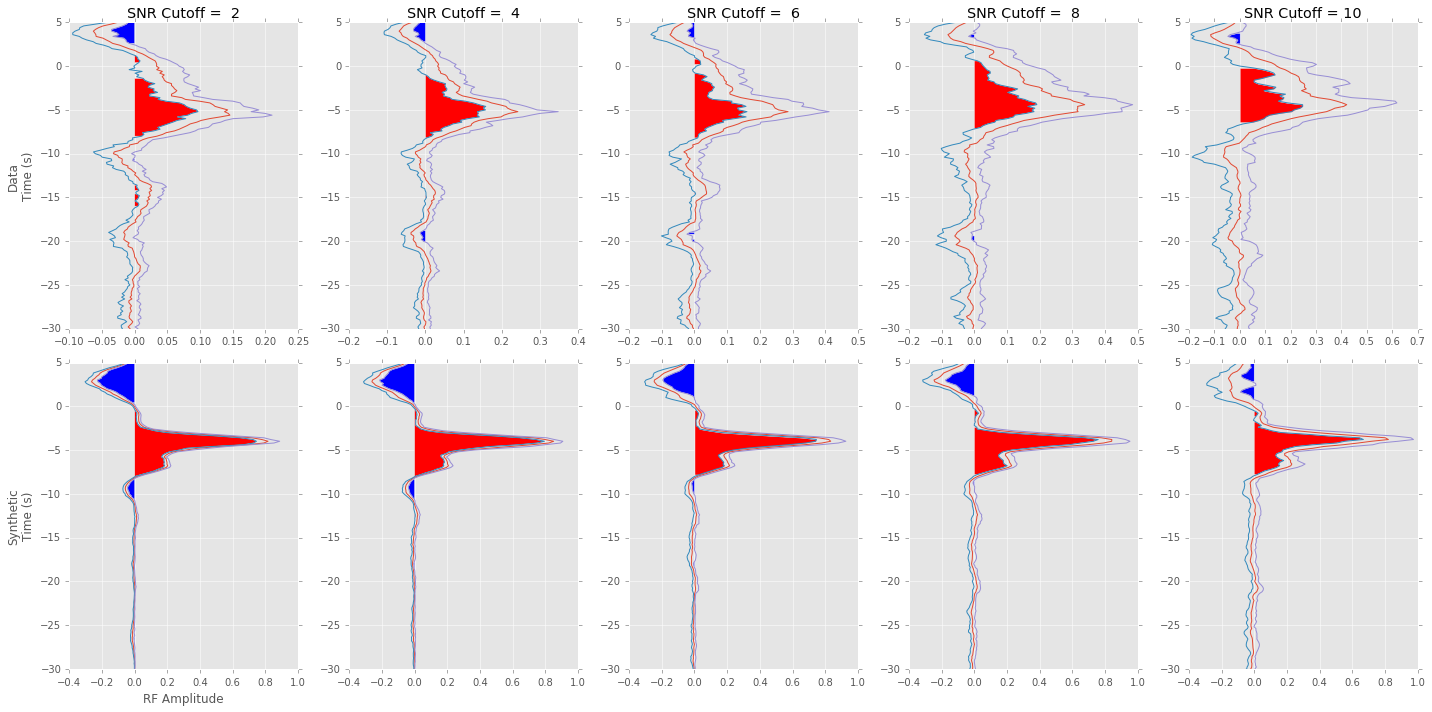

In [6]:
from numpy import nanmean, nanmedian, nanstd
from numpy.random import choice

#times, RF = ETMTM(P,D,TB,NT,dt, tag='data', nalphas=20, Poverlap=Poverlap, win_len=win_len)

#nrfs = len(cat2)
#nrfs = 329

minsnrs = arange(2, 12, 2)

#rbin_sn = rbin_s.copy() + randn(rbin_s.shape[0],rbin_s.shape[1],rbin_s.shape[2])*0.05

for iplt, minsnr in enumerate(minsnrs):
    for irow, rbin0 in enumerate([rbin, rbin_s]):
        
        snr_sample = arange(len(cat2))[mbin2[0,:]>minsnr]
        
        nrfs = len(snr_sample)
        
        rbin1=rbin0[0,snr_sample,:]
        
        nboot = 500

        bbin = zeros(nboot*len(RF)).reshape(nboot, len(RF))

        for iboot in range(nboot):
            random_sample = choice(range(nrfs), nrfs, replace=True)
            bbin[iboot,:] = nanmedian(rbin1[random_sample,:len(RF)],axis=0)

        plt.figure(1,figsize=(20,10))
        
        if irow == 0:
            plt.subplot(2,len(minsnrs),iplt+1)
        else:
            plt.subplot(2,len(minsnrs),iplt+1+len(minsnrs))

        plt.plot(nanmean(bbin, axis=0), times)
        plt.plot(nanmean(bbin, axis=0)-2*nanstd(bbin, axis=0), times)
        plt.plot(nanmean(bbin, axis=0)+2*nanstd(bbin, axis=0), times)

        plt.fill_betweenx(times,0,nanmean(bbin, axis=0)-2*nanstd(bbin, axis=0),where = nanmedian(bbin, axis=0)-2*nanstd(bbin, axis=0)>0.0,facecolor='r')
        plt.fill_betweenx(times,0,nanmean(bbin, axis=0)+2*nanstd(bbin, axis=0),where = nanmedian(bbin, axis=0)+2*nanstd(bbin, axis=0)<0.0,facecolor='b')
        #plt.plot(P)
        plt.ylim(-30,5)
        if irow == 0:
            plt.title('SNR Cutoff = %2d' % (minsnr) )

plt.subplot(2,len(minsnrs),1)
plt.ylabel('Data\nTime (s)')
plt.subplot(2,len(minsnrs),1+len(minsnrs))
plt.ylabel('Synthetic\nTime (s)')
plt.xlabel('RF Amplitude')

#plt.ylabel('Time (s)')
#plt.xlabel('RF Amplitude')
    
plt.tight_layout()
plt.savefig('FFC_SNR.eps')

(array([  25.,   57.,   29.,   17.,  241.,   58.,    0.,    0.,  475.,   15.]),
 array([   1.4630011 ,   37.18776826,   72.91253541,  108.63730257,
         144.36206973,  180.08683688,  215.81160404,  251.5363712 ,
         287.26113835,  322.98590551,  358.71067266]),
 <a list of 10 Patch objects>)

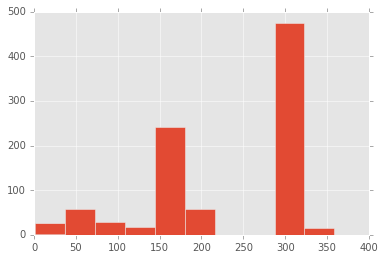

In [7]:
tmp=[]
for ievt, evt in enumerate(cat2):
    elat=evt.preferred_origin().latitude
    elon=evt.preferred_origin().longitude
    edep=evt.preferred_origin().depth/1000.0
    delm, az, baz = gps2dist_azimuth(elat, elon, slat, slon)
    deldeg = delm/1000./111.11
    tmp.append(baz)
    
plt.hist(tmp)

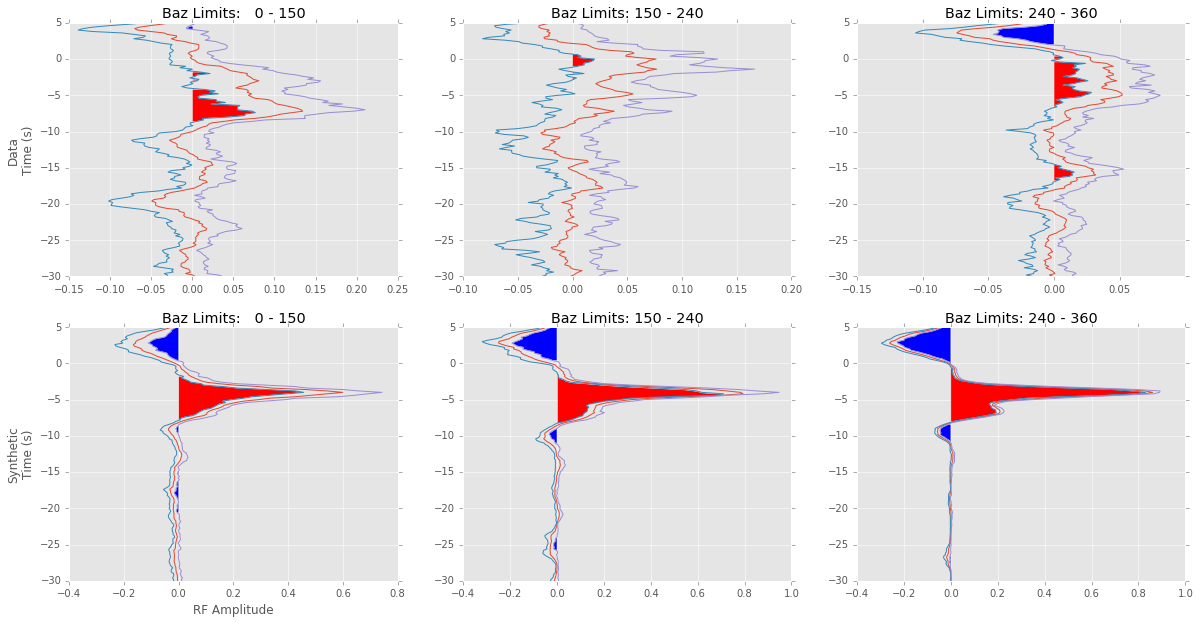

In [9]:
from numpy import nanmean, nanmedian, nanstd, array, shape
from numpy.random import choice

#times, RF = IDRF(P,D,dt)


depthranges = [(0,150),(150,240),(240,360)]

iplt = 4

for iplt, depthrange in enumerate(depthranges):
    for irow, rbin0 in enumerate([rbin, rbin_s]):
        
        dmin, dmax = depthrange[0], depthrange[1]

        slic = array(array(tmp) > dmin) & array(array(tmp) < dmax)

        #print(dmin, dmax, len(slic))

        nboot = 100

        bbin = zeros(nboot*len(RF)).reshape(nboot, len(RF))

        rbin2 = rbin0[0,slic,:len(RF)]
        nrf,_ = shape(rbin2)

        for iboot in range(nboot):

            random_sample = choice(range(nrf), nrf, replace=True)

            #print(nrf, len(random_sample))

            bbin[iboot,:] = nanmedian(rbin2[random_sample,:],axis=0)

        plt.figure(1,figsize=(20,10))
        
        if irow == 0:
            plt.subplot(2,len(depthranges),iplt+1)
        else:
            plt.subplot(2,len(depthranges),iplt+1+len(depthranges))

        plt.plot(nanmean(bbin, axis=0), times)
        plt.plot(nanmean(bbin, axis=0)-2*nanstd(bbin, axis=0), times)
        plt.plot(nanmean(bbin, axis=0)+2*nanstd(bbin, axis=0), times)

        plt.fill_betweenx(times,0,nanmean(bbin, axis=0)-2*nanstd(bbin, axis=0),where = nanmean(bbin, axis=0)-2*nanstd(bbin, axis=0)>0.0,facecolor='r')
        plt.fill_betweenx(times,0,nanmean(bbin, axis=0)+2*nanstd(bbin, axis=0),where = nanmean(bbin, axis=0)+2*nanstd(bbin, axis=0)<0.0,facecolor='b')
        #plt.plot(P)
        plt.ylim(-30,5)
        #plt.xlim(-0.3,0.3)
        plt.title('Baz Limits: %3d - %3d' % (dmin, dmax))

plt.subplot(2,len(depthranges),1)
plt.ylabel('Data\nTime (s)')
        
plt.subplot(2,len(depthranges),1+len(depthranges))
plt.ylabel('Synthetic\nTime (s)')
plt.xlabel('RF Amplitude')
    
#plt.tight_layout()
plt.savefig('FFC_baz_limted.eps')